## Prototype‐Based Accuracy Across Test Conditions

Below we present a series of bar charts summarizing  accuracy of two models (CVCL-ResNeXt and CLIP-ResNeXt) under different test conditions. Each chart corresponds to one **Test Type** (e.g. Class, Color, Size, Texture, and their combinations).  

1. **What is being measured?**  
   - **Model accuracy**: For each held-out query image, we form a class/color/size/texture “prototype” by averaging the embeddings of its peers, then ask the model to pick the correct image among 3 distractors.  
   - Accuracy = (# correct picks) / (# total trials).


---

### Class  Accuracy
- **Same‐class** condition (SC): pick one apple among three other apples, etc.  
- **Different‐class** condition (DC): pick one apple among three non‐apple images.



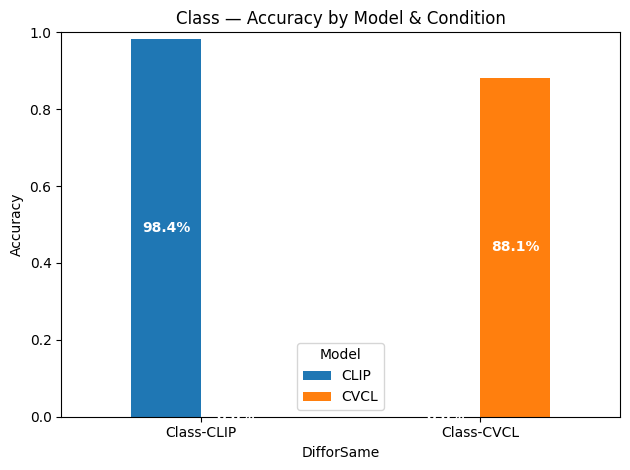

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV
csv_path = '/home/patrick/ssd/discover-hidden-visual-concepts/PatrickProject/Chart_Generation/all_prototype_results.csv'

# Load the data
df = pd.read_csv(csv_path)
df['Accuracy'] = df['Accuracy'].astype(float)

# Filter for only the 'Class' type
class_df = df[df['Type'] == 'Class']

# Pivot: DifforSame as index, Model as columns, Accuracy as values
pivot = class_df.pivot(index='DifforSame', columns='Model', values='Accuracy')

# Plot
ax = pivot.plot(kind='bar', rot=0)
ax.set_title("Class — Accuracy by Model & Condition")
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.legend(title='Model')

# Add percentage labels **inside** each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height:.1%}',
                    xy=(bar.get_x() + bar.get_width() / 2, height / 2),  # middle of bar
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='center', color='white', weight='bold')

plt.tight_layout()
plt.show()


## Class Prototype Accuracy

This chart shows the **leave-one-out class–prototype accuracy** for two models—**CLIP** and **CVCL**—on a simple “same‐class vs. different‐class” discrimination task:

- **X-axis**: The test condition (“Class-CLIP” vs. “Class-CVCL”), corresponding to the two models’ performance on held-out examples from the same class against distractors from other classes.  
- **Y-axis**: Classification accuracy (0–100%).  

**Key Results:**
- **CLIP** achieves **98.4%** accuracy, correctly identifying the held-out class example nearly all the time.
- **CVCL** achieves **88.1%** accuracy, showing strong but slightly lower performance compared to CLIP.

This comparison highlights that both models can form robust class prototypes, with CLIP exhibiting a clear performance edge on this task.


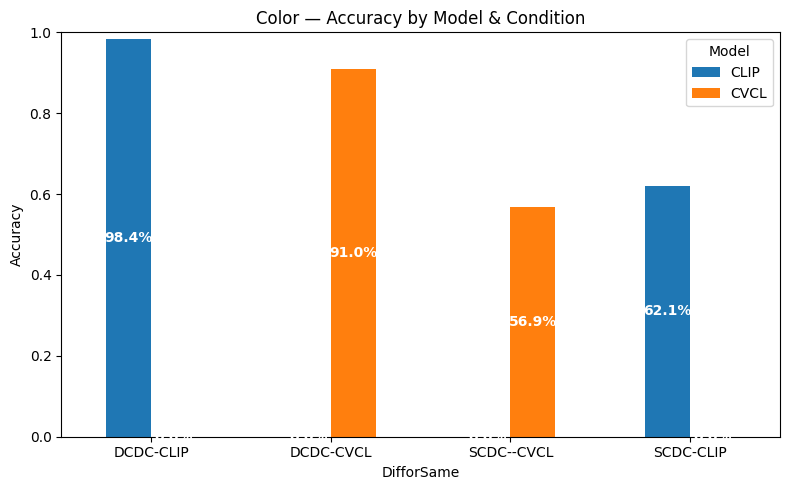

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV
csv_path = '/home/patrick/ssd/discover-hidden-visual-concepts/PatrickProject/Chart_Generation/all_prototype_results.csv'

# Load the data
df = pd.read_csv(csv_path)
df['Accuracy'] = df['Accuracy'].astype(float)

# Filter for only the 'Color' tests
color_df = df[df['Type'] == 'Color']

# Pivot: DifforSame as index, Model as columns, Accuracy as values
pivot = color_df.pivot(index='DifforSame', columns='Model', values='Accuracy')

# Plot
ax = pivot.plot(kind='bar', rot=0, figsize=(8, 5))
ax.set_title("Color — Accuracy by Model & Condition")
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.legend(title='Model')

# Add percentage labels inside each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(
            f'{height:.1%}',
            xy=(bar.get_x() + bar.get_width() / 2, height / 2),  # position at middle of bar
            xytext=(0, 0),
            textcoords="offset points",
            ha='center', va='center',
            color='white', weight='bold'
        )

plt.tight_layout()
plt.show()


## Color Prototype Accuracy

This bar chart illustrates the **prototype accuracy** of two models—**CLIP** and **CVCL**—on the **color discrimination** tasks:

- **X-axis (`DifforSame`)**  
  - **DCDC-CLIP / DCDC-CVCL**: “Different-Class Different-Color” trials—picking the prototype for a color within one class against distractors of other colors in other classes.  
  - **SCDC-CLIP / SCDC-CVCL**: “Same-Class Different-Color” trials—picking the prototype for a color within the same class against distractors of other colors in that same class.  

- **Y-axis**: Classification accuracy (0 – 1), showing how often the model correctly identifies the held-out color prototype.

**Key Observations:**
- In **DCDC** trials, both models perform exceptionally well (≈ 98 % for CLIP, 91 % for CVCL), indicating strong color sense when distractors come from different classes.  
- In **SCDC** trials (within the same class), accuracy drops more sharply, especially for CLIP (≈ 62 %) and CVCL (≈ 57 %), reflecting the increased difficulty of distinguishing colors on objects of the same category.


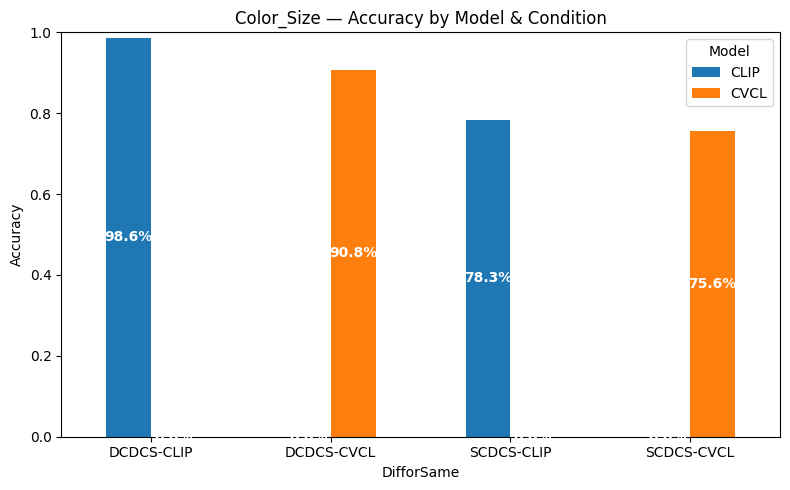

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV
csv_path = '/home/patrick/ssd/discover-hidden-visual-concepts/PatrickProject/Chart_Generation/all_prototype_results.csv'

# Load the data
df = pd.read_csv(csv_path)
df['Accuracy'] = df['Accuracy'].astype(float)

# Filter for only the 'Color_Size' tests
cs_df = df[df['Type'] == 'Color_Size']

# Pivot: DifforSame as index, Model as columns, Accuracy as values
pivot = cs_df.pivot(index='DifforSame', columns='Model', values='Accuracy')

# Plot
ax = pivot.plot(kind='bar', rot=0, figsize=(8, 5))
ax.set_title("Color_Size — Accuracy by Model & Condition")
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.legend(title='Model')

# Add percentage labels inside each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(
            f'{height:.1%}',
            xy=(bar.get_x() + bar.get_width() / 2, height / 2),
            xytext=(0, 0),
            textcoords="offset points",
            ha='center', va='center',
            color='white', weight='bold'
        )

plt.tight_layout()
plt.show()


# Color + Size Prototype Accuracy

This bar chart illustrates the **prototype classification accuracy** of two models—**CLIP** and **CVCL**—on the **Color + Size** discrimination tasks.

---

## Chart Breakdown

- **X-axis (`DifforSame`)**  
  - **DCDCS-CLIP / DCDCS-CVCL**  
    – **Different-Class, Different-Color+Size** trials  
    : Pick the held-out object (e.g. “large red apple”) among three distractors that differ in **both** color **and** size from a different class.  
  - **SCDCS-CLIP / SCDCS-CVCL**  
    – **Same-Class, Different-Color+Size** trials  
    : Pick the held-out object within the **same** class (e.g. apples) where distractors differ in both color and size.

- **Y-axis**: Classification **accuracy** (0 – 1)  
  How often the model correctly identifies the held-out prototype.

- **Bars** are grouped by test condition, with separate colors for **CLIP** (blue) and **CVCL** (orange).

---

## Key Insights

1. **High performance on DCDCS (Different-Class)**  
   - **CLIP**: ~98.6%  
   - **CVCL**: ~90.8%  
   _⇒_ Both models excel when distractors belong to **different classes** and differ in both color and size.

2. **Drop in SCDCS (Same-Class)**  
   - **CLIP**: ~78.3%  
   - **CVCL**: ~75.6%  
   _⇒_ Distinguishing fine-grained color+size differences **within** the same category (e.g. large red apple vs. small red apple) is noticeably harder, though both models remain well above chance (25%).

---

**Interpretation**  
- The large gap between DCDCS and SCDCS shows that class information strongly aids these models: when all items share the same class label, reliance on subtle color+size cues becomes critical—and error rates rise.  
- CLIP retains a slight edge over CVCL in both settings, suggesting that its web-scale contrastive pretraining gives it more robust multi-attribute discrimination, whereas CVCL (trained on child-view data) still performs impressively given its resource-constrained training.  


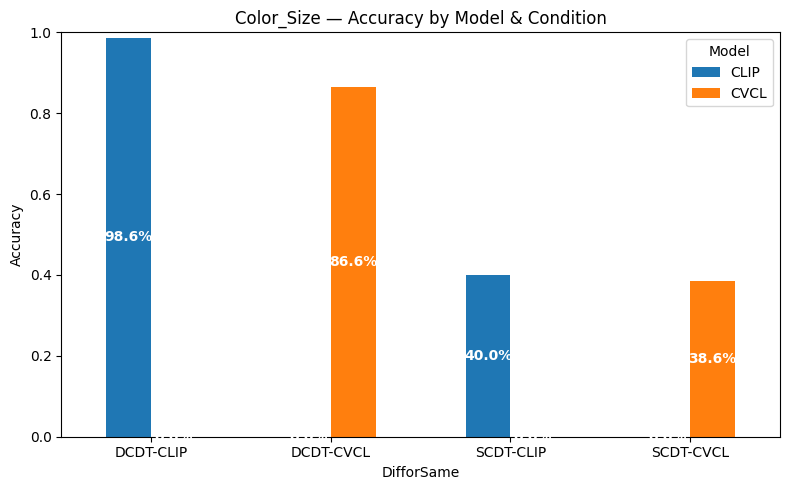

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV
csv_path = '/home/patrick/ssd/discover-hidden-visual-concepts/PatrickProject/Chart_Generation/all_prototype_results.csv'

# Load the data
df = pd.read_csv(csv_path)
df['Accuracy'] = df['Accuracy'].astype(float)

# Filter for only the 'Color_Size' tests
cs_df = df[df['Type'] == 'Texture']

# Pivot: DifforSame as index, Model as columns, Accuracy as values
pivot = cs_df.pivot(index='DifforSame', columns='Model', values='Accuracy')

# Plot
ax = pivot.plot(kind='bar', rot=0, figsize=(8, 5))
ax.set_title("Texture — Accuracy by Model & Condition")
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.legend(title='Model')

# Add percentage labels inside each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(
            f'{height:.1%}',
            xy=(bar.get_x() + bar.get_width() / 2, height / 2),
            xytext=(0, 0),
            textcoords="offset points",
            ha='center', va='center',
            color='white', weight='bold'
        )

plt.tight_layout()
plt.show()


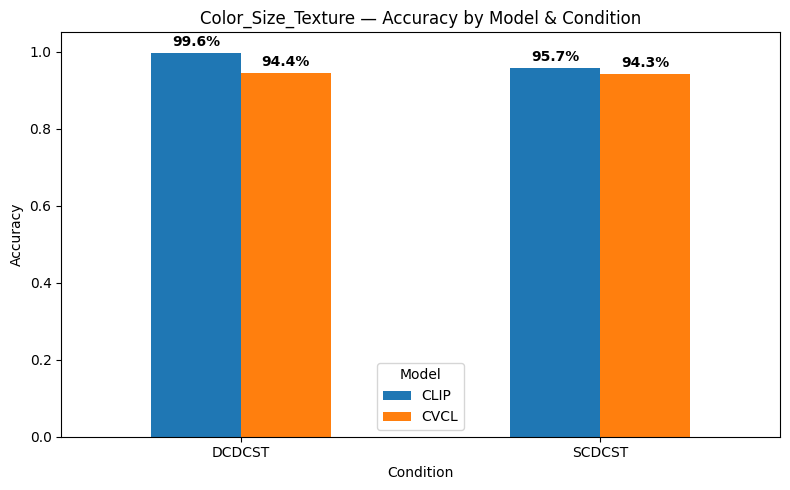

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# —– Path to your CSV
csv_path = '/home/patrick/ssd/discover-hidden-visual-concepts/PatrickProject/Chart_Generation/all_prototype_results.csv'

# —– Load & prepare
df = pd.read_csv(csv_path)
df['Accuracy'] = df['Accuracy'].astype(float)

# —– Keep only the Color_Size_Texture rows
cst_df = df[df['Type'] == 'Color_Size_Texture'].copy()

# —– Option A: extract everything before the first dash as "Condition"
#    e.g. "DCDCST-CLIP" → "DCDCST"
cst_df['Condition'] = cst_df['DifforSame'].astype(str).str.partition('-')[0]

# —– Pivot on the newly created Condition
pivot = cst_df.pivot(index='Condition', columns='Model', values='Accuracy')

# —– Plot
fig, ax = plt.subplots(figsize=(8, 5))
pivot.plot(kind='bar', rot=0, ax=ax)

ax.set_title("Color_Size_Texture — Accuracy by Model & Condition")
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1.05)        # headroom for the labels
ax.legend(title='Model')

# —– Annotate each bar just above its top
for bar in ax.patches:
    h = bar.get_height()
    ax.annotate(
        f'{h:.1%}',
        (bar.get_x() + bar.get_width() / 2, h + 0.01),
        ha='center', va='bottom', weight='bold'
    )

plt.tight_layout()
plt.show()


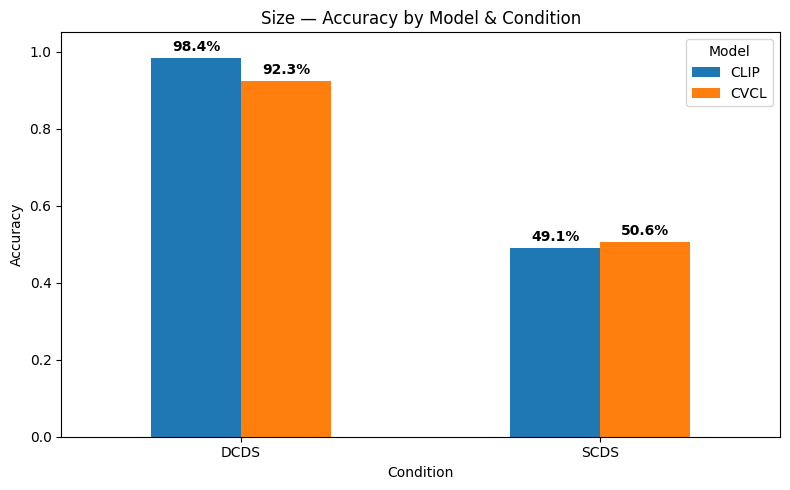

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# —– Path to your CSV
csv_path = '/home/patrick/ssd/discover-hidden-visual-concepts/PatrickProject/Chart_Generation/all_prototype_results.csv'

# —– Load & prepare
df = pd.read_csv(csv_path)
df['Accuracy'] = df['Accuracy'].astype(float)

# —– Keep only the Color_Size_Texture rows
cst_df = df[df['Type'] == 'Size'].copy()

# —– Option A: extract everything before the first dash as "Condition"
#    e.g. "DCDCST-CLIP" → "DCDCST"
cst_df['Condition'] = cst_df['DifforSame'].astype(str).str.partition('-')[0]

# —– Pivot on the newly created Condition
pivot = cst_df.pivot(index='Condition', columns='Model', values='Accuracy')

# —– Plot
fig, ax = plt.subplots(figsize=(8, 5))
pivot.plot(kind='bar', rot=0, ax=ax)

ax.set_title("Size — Accuracy by Model & Condition")
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1.05)        # headroom for the labels
ax.legend(title='Model')

# —– Annotate each bar just above its top
for bar in ax.patches:
    h = bar.get_height()
    ax.annotate(
        f'{h:.1%}',
        (bar.get_x() + bar.get_width() / 2, h + 0.01),
        ha='center', va='bottom', weight='bold'
    )

plt.tight_layout()
plt.show()


This compares size only you can see that CVCL even outperforms CLIP when it is in the same Class test